In [17]:
import keypoint_moseq as kpms
import matplotlib.pyplot as plt

project_dir = "project"
config = lambda: kpms.load_config(project_dir)

In [18]:

coordinates, confidences, bodyparts = kpms.load_keypoints(
    config()['video_dir'],
    "deeplabcut",
    extension=".csv",
)

data, metadata = kpms.format_data(coordinates, confidences, **config())


Loading keypoints: 100%|████████████████| 50/50 [00:00<00:00, 89.47it/s]


Loading sample frames: 100%|██████████| 100/100 [00:01<00:00, 83.42it/s]


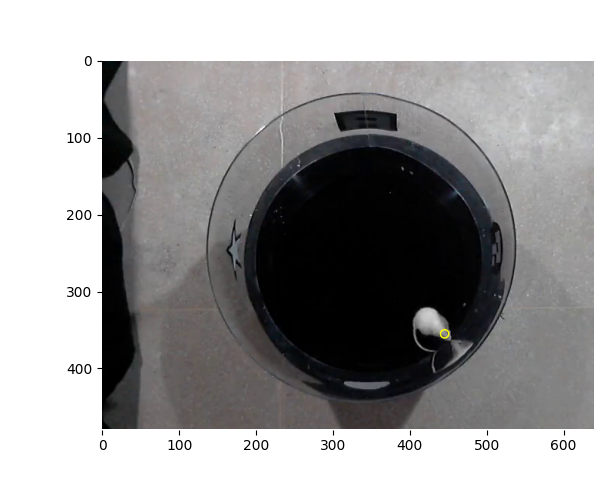

In [ ]:
# Error calibration
%matplotlib widget
kpms.noise_calibration(project_dir, coordinates, confidences, **config())

>=90.0% of variance exlained by 3 components.


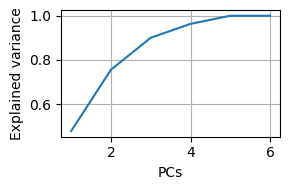

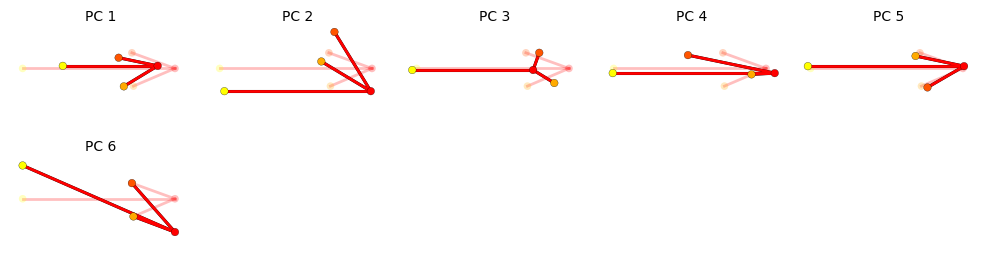

In [19]:
plt.close('all')
%matplotlib inline
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)

kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())

# use the following to load an already fit model
# pca = kpms.load_pca(project_dir)

In [ ]:
# initialize the model
model = kpms.init_model(data, pca=pca, **config())

# optionally modify kappa
# model = kpms.update_hypparams(model, kappa=NUMBER)


AttributeError: jax.tree_map was removed in JAX v0.6.0: use jax.tree.map (jax v0.4.25 or newer) or jax.tree_util.tree_map (any JAX version).

: 

In [ ]:
# Apenas o AR-HMM

num_ar_iters = 50

model, model_name = kpms.fit_model(
    model, data, metadata, project_dir, ar_only=True, num_iters=num_ar_iters
)

In [ ]:
# load model checkpoint
model, data, metadata, current_iter = kpms.load_checkpoint(
    project_dir, model_name, iteration=num_ar_iters
)

# modify kappa to maintain the desired syllable time-scale
model = kpms.update_hypparams(model, kappa=1e4)

# run fitting for an additional 500 iters
model = kpms.fit_model(
    model,
    data,
    metadata,
    project_dir,
    model_name,
    ar_only=False,
    start_iter=current_iter,
    num_iters=current_iter + 500,
)[0]